## Dataset Information
#### The data set contains the recordings of 16 chemical sensors exposed to two dynamic gas mixtures at varying concentrations. For each mixture, signals were acquired continuously during 12 hours.
### Dataset Characteristics

* Multivariate, Time-Series
* Associated Tasks : Classification, Regression
* Feature Type: Real
* Instances : 4178504
* Dimentions : 19

## Additional Information
This data set contains the acquired time series from 16 chemical sensors exposed to gas mixtures at varying concentration levels. In particular, we generated two gas mixtures: Ethylene and Methane in air, and Ethylene and CO in air. Each measurement was constructed by the continuous acquisition of the 16-sensor array signals for a duration of about 12 hours without interruption. 

The data set was collected in a gas delivery platform facility at the ChemoSignals Laboratory in the BioCircuits Institute, University of California San Diego. The measurement system platform provides versatility for obtaining the desired concentrations of the chemical substances of interest with high accuracy and in a highly reproducible manner. 

The sensor array included 16 chemical sensors (Figaro Inc., US) of 4 different types: TGS-2600, TGS-2602, TGS-2610, TGS-2620 (4 units of each type). The sensors were integrated with customized signal conditioning and control electronics. The operating voltage of the sensors, which controls the sensorsâ€™ operating temperature, was kept constant at 5 V for the whole duration of the experiments. The sensorsâ€™ conductivities were acquired continuously at a sampling frequency of 100 Hz. The sensor array was placed in a 60 ml measurement chamber, where the gas sample was injected at a constant flow of 300 ml/min.

Each measurement was constructed by the continuous acquisition of the 16-sensor array signals while concentration levels changed randomly. For each measurement (each gas mixture), the signals were acquired continuously for about 12 hours without interruption. 

The concentration transitions were set at random times (in the interval 80-120s) and to random concentration levels. The data set was constructed such that all possible transitions are present: increasing, decreasing, or setting to zero the concentration of one volatile while the concentration of the other volatile is kept constant (either at a fixed or at zero concentration level). At the beginning, ending, and approximately every 10,000 s, we inserted additional predefined concentration patterns with pure gas mixtures.

The concentration ranges for Ethylene, Methane, and CO were selected such that the induced magnitudes of the sensor responses were similar. Moreover, for gas mixtures, lower concentration levels were favored. Therefore, the multivariate response of the sensors to the presented set of stimuli is challenging since none of the configurations (single
gas or mixture presentation) can be easily identified from the magnitude of sensorsâ€™ responses. In particular Ethylene concentration ranges from 0-20 ppm; 0-600 ppm for CO; and 0-300 ppm for Methane.

More information on the generated data set can be found in Fonollosa et al. 'Reservoir Computing compensates slow response of chemosensor arrays exposed to fast varying gas concentrations in continuous monitoring'; Sensors and Actuators B, 2015. 


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os


In [2]:

#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/gas_sensors_dynamic_mixtures" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    ds_list.append(item)
    print(item)

ethylene_methane.txt
ethylene_CO.txt


In [3]:
new_path = os.path.join(dataset_path,ds_list[0]) #change this to ds_list[1] for the other file
new_path

'/Users/moji/dataset_repo/gas_sensors_dynamic_mixtures/ethylene_methane.txt'

In [4]:
# Read the first line to get column names
with open(new_path, 'r') as file:
    header = file.readline().strip().split(',')

new_header = header[:3]  # Keep the first 3 columns as they are
new_header.extend([f'sensor {i}' for i in range(1, 17)])

new_header



['Time (seconds)',
 ' Methane conc (ppm)',
 ' Ethylene conc (ppm)',
 'sensor 1',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 5',
 'sensor 6',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 10',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 16']

In [5]:
# Read the rest of the file with space as separator
df = pd.read_csv(new_path, sep='\s+', skiprows=1, header=None, index_col=0)

# Get the number of columns in the data
num_columns = len(df.columns)

# Extend the header list to match the number of columns
if len(header) < num_columns + 1:  # +1 because one column became the index
    header.extend([header[-1]] * (num_columns - len(header) + 1))

# Assign the column names, excluding the first one (which is now the index)
df.columns = new_header[1:]

# Convert the index from seconds to datetime
df.index = pd.to_datetime(df.index, unit='s')

df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_58497/2733426311.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(new_path, sep='\s+', skiprows=1, header=None, index_col=0)


,Methane conc (ppm),Ethylene conc (ppm),sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9,sensor 10,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16
0,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1970-01-01 00:00:00.010,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
1970-01-01 00:00:00.020,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
1970-01-01 00:00:00.030,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
1970-01-01 00:00:00.040,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 11:36:30.150,0.0,0.0,2348.01,1599.24,1329.94,1488.62,1031.11,1431.76,1335.58,1506.05,3300.43,2634.70,1156.91,975.15,972.41,929.27,1211.47,948.94
1970-01-01 11:36:30.160,0.0,0.0,2341.81,1605.37,1333.28,1479.61,1022.80,1421.56,1336.00,1500.45,3277.72,2640.67,1155.49,975.15,963.60,938.42,1222.74,937.25
1970-01-01 11:36:30.170,0.0,0.0,2345.78,1604.06,1337.47,1475.10,1022.61,1423.68,1345.63,1504.76,3299.56,2622.24,1153.47,964.18,978.68,949.92,1204.32,921.50


In [6]:
4178504/360000

11.606955555555556

In [7]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Methane conc (ppm),4178504.0,58.09,76.64,0.00,0.00,0.00,100.00,296.67
Ethylene conc (ppm),4178504.0,4.37,5.52,0.00,0.00,0.00,8.33,20.00
sensor 1,4178504.0,2520.16,253.20,-56.48,2335.12,2463.49,2676.93,3402.56
sensor 2,4178504.0,1711.45,118.48,1568.88,1639.01,1701.30,1754.58,9825.75
sensor 3,4178504.0,2756.60,1150.49,-47.78,1581.31,2885.64,3798.99,5567.44
sensor 4,4178504.0,3035.85,1252.09,-6.83,1750.76,3199.85,4172.03,6127.68
sensor 5,4178504.0,1863.26,1104.96,-12.68,819.76,1393.18,2813.35,4420.84
sensor 6,4178504.0,2386.33,1425.09,-41.98,1061.50,1688.83,3605.26,5707.53
sensor 7,4178504.0,2689.91,1102.78,-15.28,1533.26,2785.62,3610.69,5304.14
sensor 8,4178504.0,2978.96,1229.72,-11.87,1660.44,3136.35,4083.02,5820.37


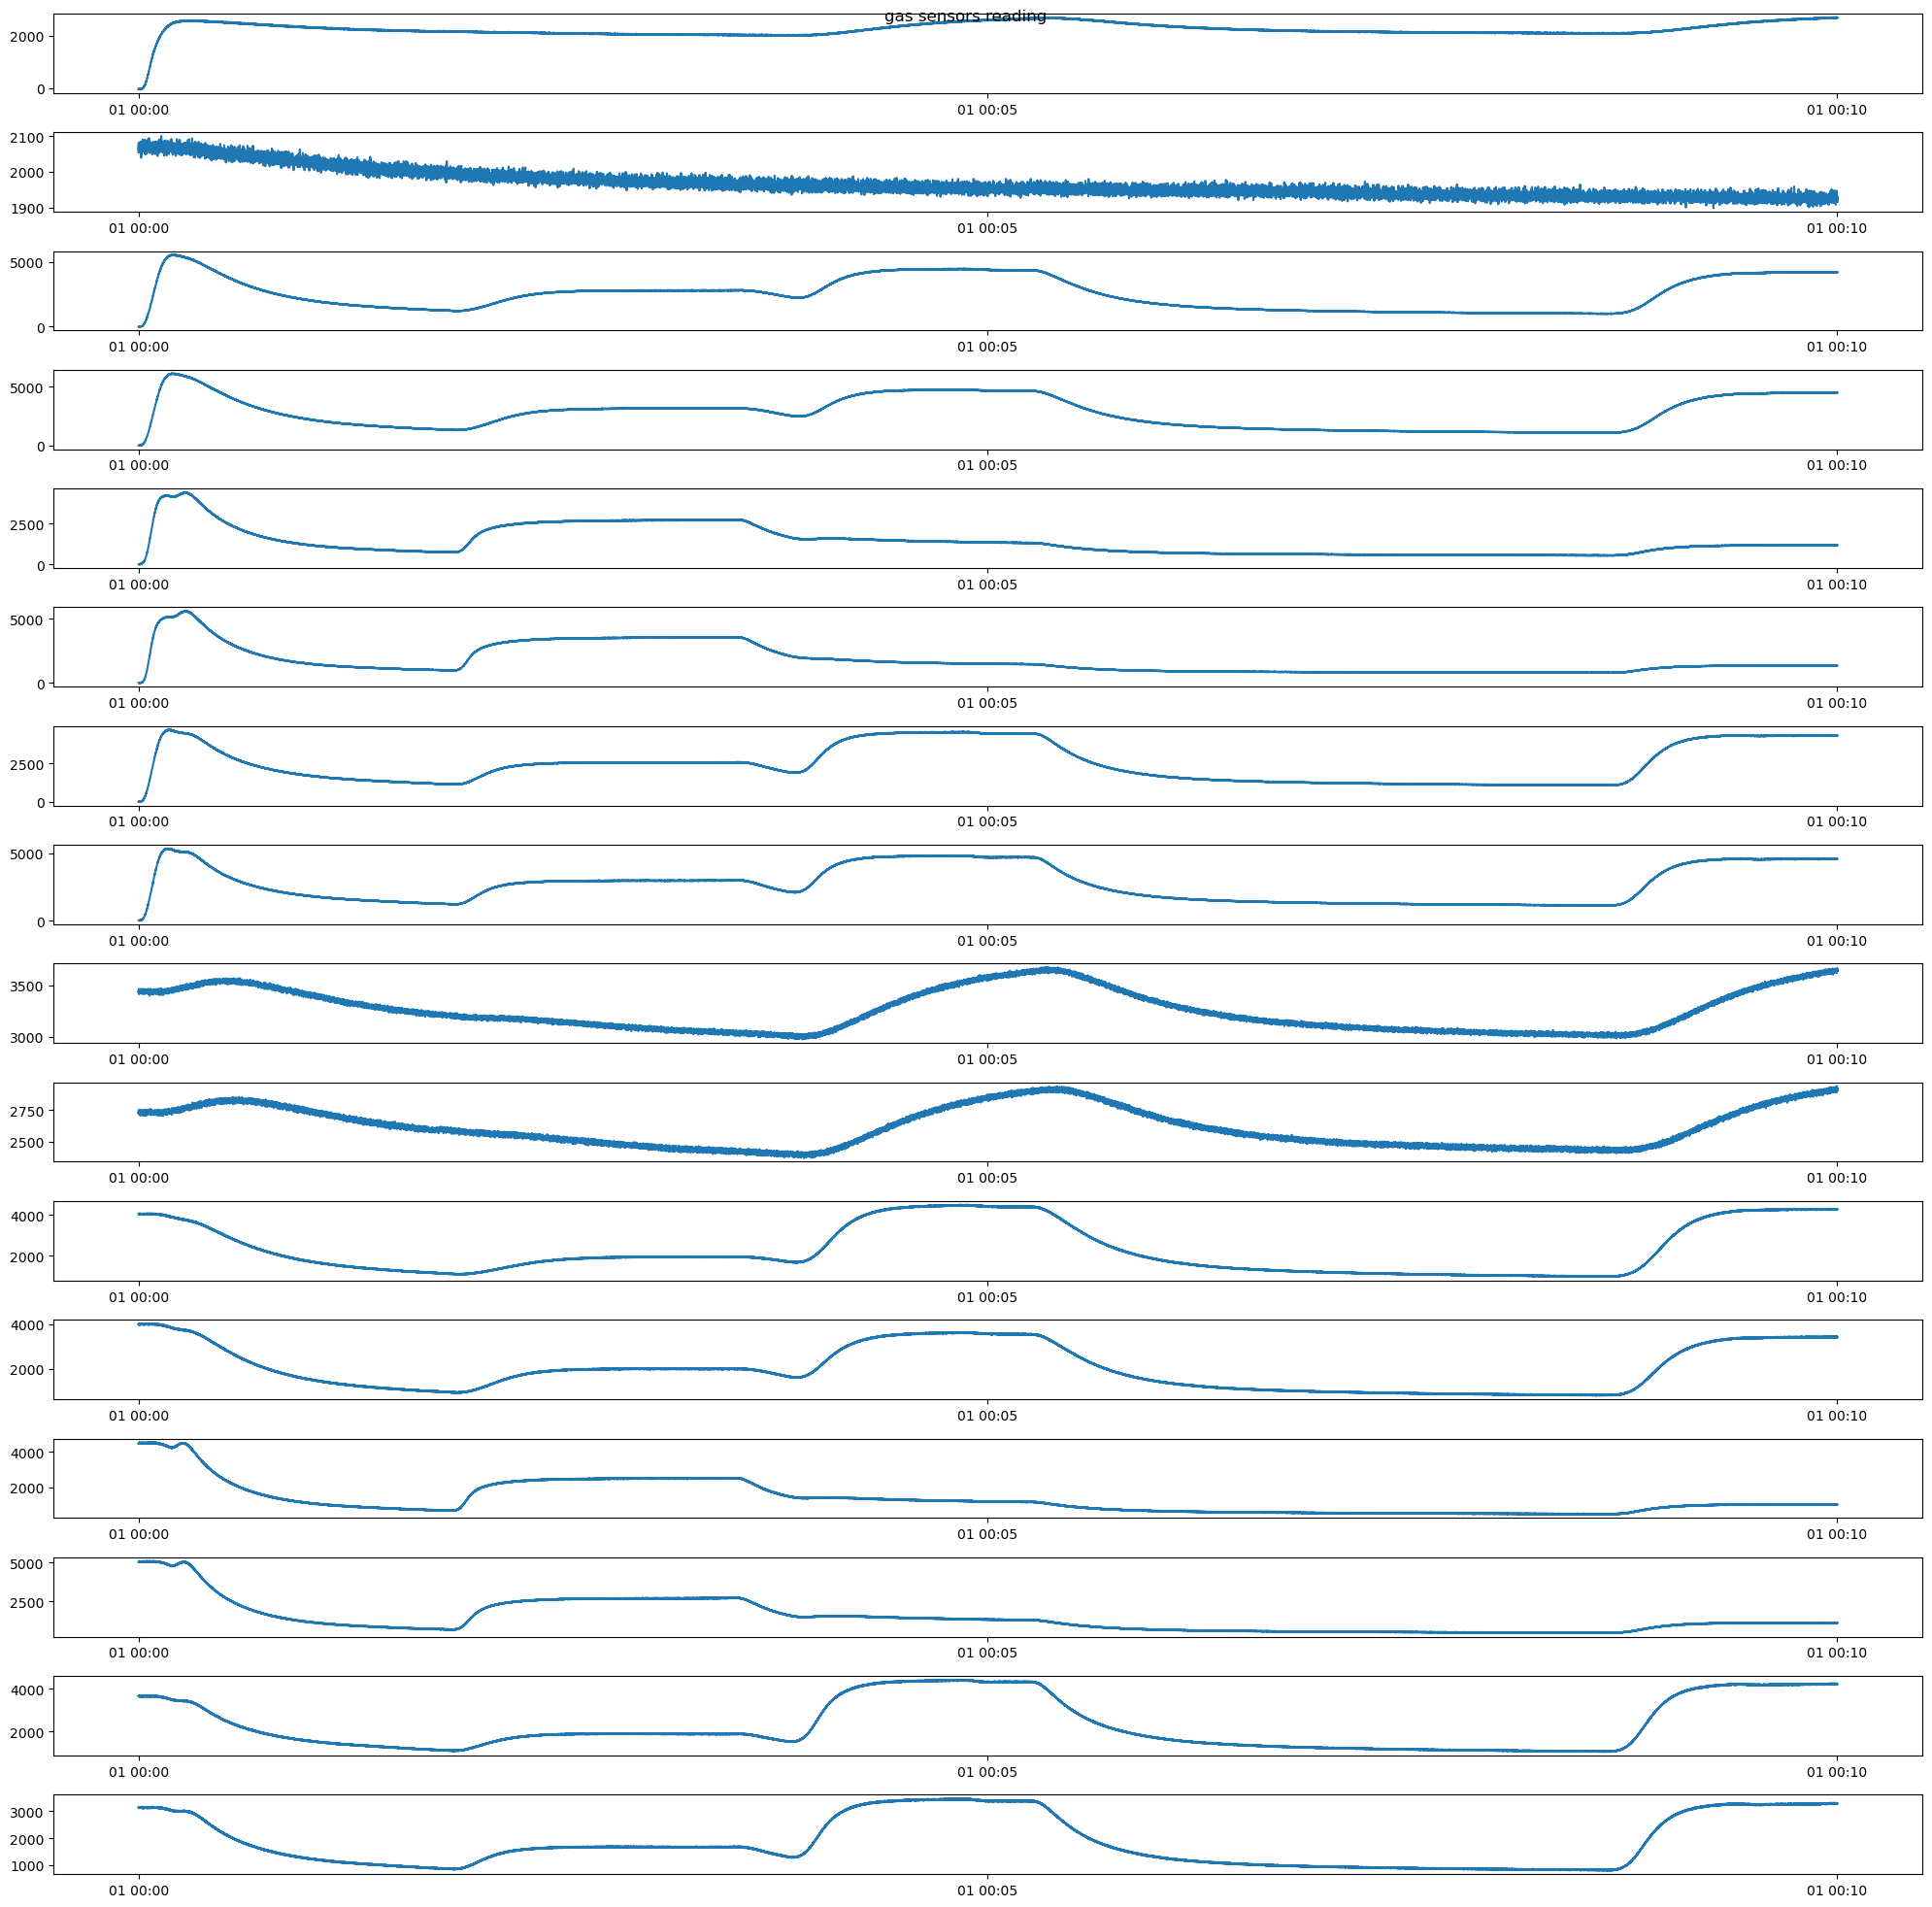

In [8]:
fig, axs = plt.subplots(16,figsize=(20, 20))
fig.suptitle('gas sensors reading')
for i in range(16):
    axs[i].plot(df.iloc[0:60000,i+2])

plt.tight_layout()
plt.show()

In [9]:
n = len(df)
# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
train_df.shape, val_df.shape, test_df.shape

((2924952, 18), (835701, 18), (417851, 18))

In [10]:
train_df.iloc[0,:]

 Methane conc (ppm)        0.00
 Ethylene conc (ppm)       0.00
sensor 1                 -41.98
sensor 2                2067.64
sensor 3                 -37.13
sensor 4                   2.28
sensor 5                   8.63
sensor 6                 -26.62
sensor 7                  -8.46
sensor 8                  -0.33
sensor 9                3437.73
sensor 10               2728.14
sensor 11               4054.03
sensor 12               4007.89
sensor 13               4478.27
sensor 14               5056.98
sensor 15               3639.09
sensor 16               3128.49
Name: 1970-01-01 00:00:00, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

MinMaxScaler()

In [12]:
train_df[train_df.columns] = scaler.transform(train_df[train_df.columns]) 
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns]) 
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_58497/1161138797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_58497/1161138797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_58497/1161138797.py:3: SettingWithCopyWarning: 
A value i

In [13]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Methane conc (ppm),2924952.0,0.218347,0.272742,0.0,0.000000,0.000000,0.382007,1.0
Ethylene conc (ppm),2924952.0,0.212214,0.271191,0.0,0.000000,0.000000,0.416500,1.0
sensor 1,2924952.0,0.733527,0.070820,0.0,0.683620,0.716424,0.778988,1.0
sensor 2,2924952.0,0.015044,0.014780,0.0,0.008317,0.012512,0.018878,1.0
sensor 3,2924952.0,0.507918,0.201246,0.0,0.311448,0.530131,0.692979,1.0
sensor 4,2924952.0,0.505249,0.200770,0.0,0.308483,0.529870,0.693149,1.0
sensor 5,2924952.0,0.442245,0.252161,0.0,0.199160,0.418956,0.671636,1.0
sensor 6,2924952.0,0.441010,0.251823,0.0,0.200135,0.413357,0.658228,1.0
sensor 7,2924952.0,0.516737,0.203984,0.0,0.312130,0.541849,0.689960,1.0
sensor 8,2924952.0,0.523888,0.208570,0.0,0.309879,0.549880,0.710964,1.0


In [14]:
# are_equal = np.array_equal(X_stride[0,:,2], data[0:1000,2])
# print(are_equal)

In [42]:
import sys
import os

# pecify the path to the 'modules' directory
sys.path.append('/Users/moji/PyTSF-MfG/modules')

# Now you can import rolling_window
from rolling_window import create_rolling_window_dataset_with_time


In [22]:
def create_rolling_window_dataset_with_time(data, window_size, horizon, step=1, target_column=5):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame")
    
    if not isinstance(data.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DateTimeIndex")
    
    n_samples, n_features = data.shape

    if n_samples < window_size + horizon:
        raise ValueError("Not enough data points for the given window size and horizon.")

    n_windows = (n_samples - window_size - horizon) // step + 1

    # Convert the DataFrame to a NumPy array
    data_values = data.values

    X_stride = np.lib.stride_tricks.as_strided(
        data_values,
        shape=(n_windows, window_size, n_features),
        strides=(data_values.strides[0] * step, data_values.strides[0], data_values.strides[1])
    )

    y_stride = np.lib.stride_tricks.as_strided(
        data_values[:, target_column],
        shape=(n_windows, horizon),
        strides=(data_values.strides[0] * step, data_values.strides[0])
    )

    time_stride = [data.index[i: i + window_size] for i in range(0, n_samples - window_size - horizon + 1, step)]

    return X_stride, y_stride, time_stride

In [43]:
# Usage:
window_size = 1000
horizon = 500
step = 100
# data = train_df.to_numpy()
# time_index = train_df.index.to_numpy()  # Assuming your DataFrame has a time index

X_train , y_train, time_index = create_rolling_window_dataset_with_time(train_df, window_size, horizon, step)
X_train.shape, y_train.shape, len(time_index)

((29235, 1000, 18), (29235, 500), 29235)

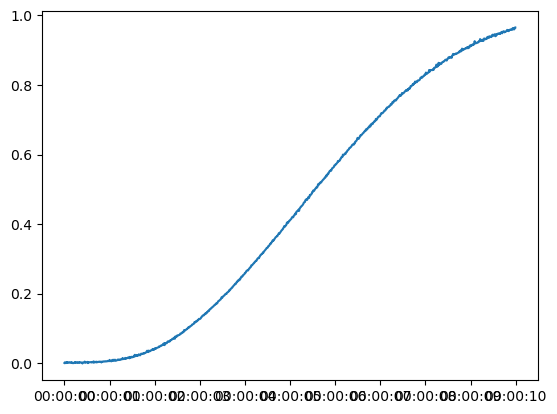

In [45]:
plt.plot(time_index[0],X_train[0,:,5])

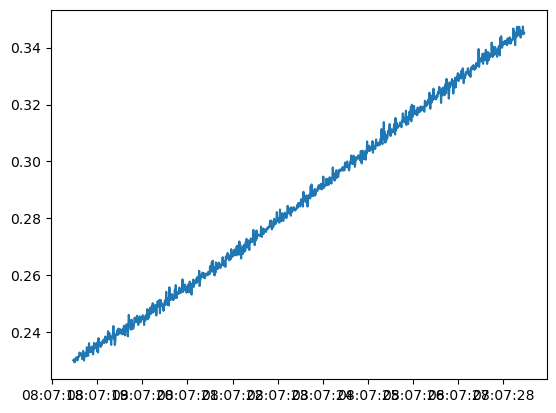

In [62]:
plt.plot(time_index[29234],X_train[29234,:,5])

In [ ]:
X_train[0,0,1]